In [1]:
# Exercise 8: Classify Setosa and not Setosa with SVM. Make Linear and SVC roughly same
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
X_df = pd.DataFrame(data=X[:, :2], columns=["sepal_l", "sepal_w"])
y_df = pd.Series(data=y, name="type")

In [4]:
y_df.replace(1, 2, inplace = True)
y_df.replace(0, 1, inplace = True)
y_df.replace(2, 0, inplace = True)

No handles with labels found to put in legend.


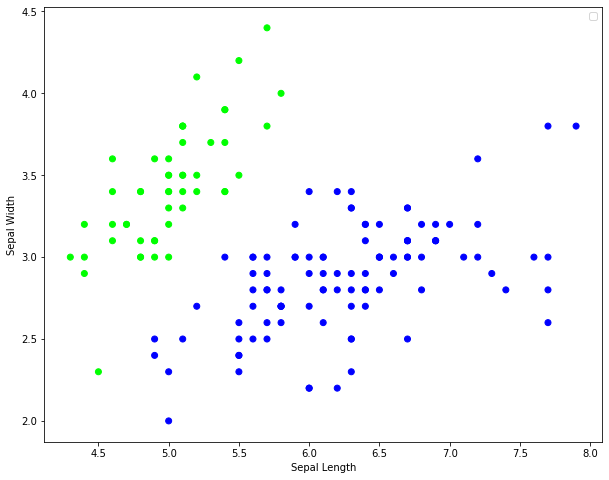

In [5]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(X_df.loc[:, "sepal_l"], X_df.loc[:, "sepal_w"], c=y_df, cmap="brg")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

In [6]:
# Split train_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=0)

In [7]:
X_train.head(5)

sepal_l  sepal_w
60       5.0      2.0
116      6.5      3.0
144      6.7      3.3
119      6.0      2.2
108      6.7      2.5

No handles with labels found to put in legend.


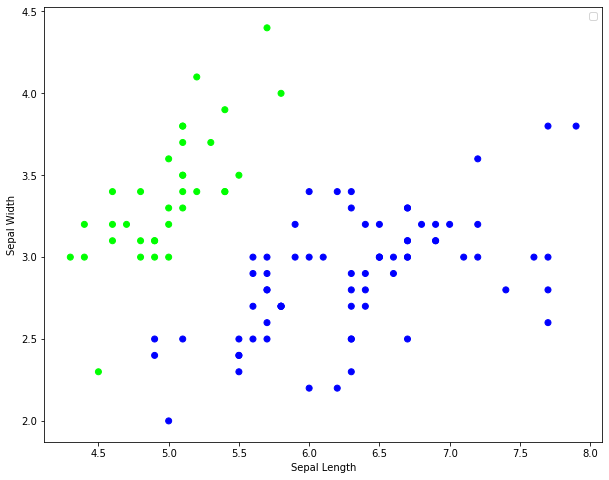

In [8]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(X_train.loc[:, "sepal_l"], X_train.loc[:, "sepal_w"], c=y_train, cmap="brg")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

In [9]:
# Scale Data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

standard_scaler = StandardScaler()
linear_svm = LinearSVC(random_state=42)
estimators = [
    ("scaler", standard_scaler),
    ("svm", linear_svm)
]
linear_model = Pipeline(estimators)
linear_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=42,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [10]:
train_preds = linear_model.predict(X_train)
test_preds = linear_model.predict(X_test)

In [11]:
from sklearn.metrics import precision_score, recall_score
train_p = precision_score(y_train, train_preds)  
train_r = recall_score(y_train, train_preds)
print("Train Precision: %.5f" % train_p)
print("Train Recall: %.5f " % train_r)

Train Precision: 1.00000
Train Recall: 1.00000 


In [12]:
from sklearn.metrics import precision_score, recall_score
test_p = precision_score(y_test, test_preds)  
test_r = recall_score(y_test, test_preds)
print("Test Precision: %.5f" % test_p)
print("Test Recall: %.5f " % test_r)

Test Precision: 1.00000
Test Recall: 1.00000 


In [13]:
linear_model["svm"].coef_

array([[-1.78620476,  1.00112609]])

In [14]:
linear_model["svm"].intercept_

array([-1.11011861])

In [15]:
# SVC model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

standard_scaler = StandardScaler()
svc = SVC(kernel="linear", random_state=42, C=0.6)
estimators = [
    ("scaler", standard_scaler),
    ("svm", svc)
]
svc_model = Pipeline(estimators)
svc_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm',
                 SVC(C=0.6, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=42, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [16]:
svc_model["svm"].coef_

array([[-1.93840658,  1.21860102]])

In [17]:
svc_model["svm"].intercept_

array([-1.30464343])

In [18]:
train_preds = svc_model.predict(X_train)
test_preds = svc_model.predict(X_test)

from sklearn.metrics import precision_score, recall_score
train_p = precision_score(y_train, train_preds)  
train_r = recall_score(y_train, train_preds)
print("Train Precision: %.5f" % train_p)
print("Train Recall: %.5f " % train_r)

test_p = precision_score(y_test, test_preds)  
test_r = recall_score(y_test, test_preds)
print("Test Precision: %.5f" % test_p)
print("Test Recall: %.5f " % test_r)

Train Precision: 1.00000
Train Recall: 0.97059 
Test Precision: 1.00000
Test Recall: 1.00000 


In [19]:
import numpy as np
def plot_boundary(pipeline, xmin, xmax, X_train, y_train):
    w = pipeline["svm"].coef_[0]
    b = pipeline["svm"].intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    prep_X_train = pipeline["scaler"].fit_transform(X_train)
    
    plt.scatter(prep_X_train[:, 0], prep_X_train[:, 1], c=y_train, s=20, cmap="brg")
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

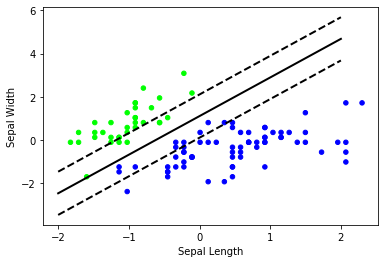

In [20]:
plot_boundary(linear_model, -2, 2, X_train, y_train)

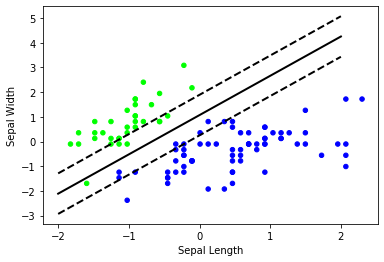

In [21]:
plot_boundary(svc_model, -2, 2, X_train, y_train)

In [23]:
# Exercise 9: Train SVM on MNIST using one vs all, show accuracy
import pandas as pd
mnist = pd.read_csv("../digit-recognizer/train.csv", nrows=20000)
y = mnist["label"]
X = mnist.iloc[:, 1:]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
standard_scaler = StandardScaler()
multiclass_svm = OneVsRestClassifier(SVC(), n_jobs=2)

estimators = [
    ("scaler", standard_scaler),
    ("svm", multiclass_svm)
]

svm_model = Pipeline(estimators)

In [26]:
svm_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm',
                 OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False,
                                                   cache_size=200,
                                                   class_weight=None, coef0=0.0,
                                                   decision_function_shape='ovr',
                                                   degree=3, gamma='scale',
                                                   kernel='rbf', max_iter=-1,
                                                   probability=False,
                                                   random_state=None,
                                                   shrinking=True, tol=0.001,
                                                   verbose=False),
                                     n_jobs=2))],
         verbose=False)

In [29]:
train_preds = svm_model.predict(X_train)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
# Check train and test accuracy before doing gridsearch
train_accuracy = accuracy_score(y_train, train_preds)
print("Train accuracy:  %.5f " % train_accuracy)

Train accuracy:  0.98244 


In [32]:
test_preds = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
print("Test accuracy:  %.5f " % test_accuracy)

Test accuracy:  0.95025 


In [33]:
# Parameter search
param_grid = [
    {"svm__estimator__C": [1, 10, 100], "svm__estimator__gamma":[0.001, 1, "auto"], "svm__estimator__kernel":["rbf"],"svm__estimator__max_iter":[500]},
    {"svm__estimator__C": [1, 10, 100], "svm__estimator__kernel":["linear"], "svm__estimator__max_iter":[500]},
    {"svm__estimator__C": [1, 10, 100], "svm__estimator__degree":[2, 3, 5], "svm__estimator__kernel":["poly"], "svm__estimator__max_iter":[500]}
]

In [34]:
import numpy as np
test_fold = np.random.choice([-1, 0], size=X_train.shape[0], p=[0.9, 0.1])

In [35]:
test_fold

array([-1,  0, -1, ..., -1,  0, -1])

In [36]:
unique, counts = np.unique(test_fold, return_counts=True)

In [37]:
counts

array([14457,  1543])

In [38]:
from sklearn.model_selection import PredefinedSplit
ps = PredefinedSplit(test_fold=test_fold)

In [39]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(
    svm_model, 
    param_grid, 
    scoring="accuracy",
    cv=ps,
    verbose=5,
    n_jobs=4
)

In [40]:
grid_cv.fit(X_train, y_train)

Fitting 1 folds for each of 21 candidates, totalling 21 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 12.7min
[Parallel(n_jobs=4)]: Done  19 out of  21 | elapsed: 22.0min remaining:  2.3min
[Parallel(n_jobs=4)]: Done  21 out of  21 | elapsed: 23.2min finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1,  0, ...,  0, -1])),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svm',
                                        OneVsRestClassifier(estimator=SVC(C=1.0,
                                                                          break_ties=False,
                                                                          cache_size=200,
                                                                          class_weight=None,
                                                                          coef0=0.0,
                                                                          decision_function_shape='ovr',


In [41]:
# Check train and test accuracy after doing gridsearch
train_preds = grid_cv.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)
print("Train accuracy:  %.5f " % train_accuracy)

test_preds = grid_cv.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
print("Test accuracy:  %.5f " % test_accuracy)

Train accuracy:  0.99644 
Test accuracy:  0.96025 


In [48]:
grid_cv.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('svm',
   OneVsRestClassifier(estimator=SVC(C=100, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=2,
                                     gamma='scale', kernel='poly', max_iter=500,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                       n_jobs=2))],
 'verbose': False,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'svm': OneVsRestClassifier(estimator=SVC(C=100, break_ties=False, cache_size=200,
                                   class_weight=None, coef0=0.0,
                                   decision_function_shape='ovr', degree=2,
                                   gamma='scale', kernel='poly', max_iter=500,
   

In [56]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=500, C=100)

In [57]:
log_reg.fit(X_train, y_train)

/home/long/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
# Check train and test accuracy after doing gridsearch
train_preds = log_reg.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)
print("Train accuracy:  %.5f " % train_accuracy)

test_preds = log_reg.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
print("Test accuracy:  %.5f " % test_accuracy)

Train accuracy:  0.98994 
Test accuracy:  0.86100 
